# Importation of libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import plotly.express as px

In [2]:
dataset_path = "/home/matthieu/UbuntuData/PycharmProjects/MelodAI/data/raw/dataset.csv"

In [3]:
# Load the dataset
dataframe = pd.read_csv(dataset_path, low_memory=False)

In [4]:
dataframe.describe()

,Unnamed: 0,popularity,duration_ms,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
count,114000.000000,114000.000000,1.140000e+05,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000
mean,56999.500000,33.238535,2.280292e+05,0.566800,0.641383,5.309140,-8.258960,0.637553,0.084652,0.314910,0.156050,0.213553,0.474068,122.147837,3.904035
std,32909.109681,22.305078,1.072977e+05,0.173542,0.251529,3.559987,5.029337,0.480709,0.105732,0.332523,0.309555,0.190378,0.259261,29.978197,0.432621
min,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,-49.531000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,28499.750000,17.000000,1.740660e+05,0.456000,0.472000,2.000000,-10.013000,0.000000,0.035900,0.016900,0.000000,0.098000,0.260000,99.218750,4.000000
50%,56999.500000,35.000000,2.129060e+05,0.580000,0.685000,5.000000,-7.004000,1.000000,0.048900,0.169000,0.000042,0.132000,0.464000,122.017000,4.000000
75%,85499.250000,50.000000,2.615060e+05,0.695000,0.854000,8.000000,-5.003000,1.000000,0.084500,0.598000,0.049000,0.273000,0.683000,140.071000,4.000000
max,113999.000000,100.000000,5.237295e+06,0.985000,1.000000,11.000000,4.532000,1.000000,0.965000,0.996000,1.000000,1.000000,0.995000,243.372000,5.000000


In [5]:
# Remove null values
df = dataframe.dropna()

In [6]:
# head
df.head()

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,...,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4,acoustic
1,1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,...,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4,acoustic
2,2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,...,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4,acoustic
3,3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,...,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3,acoustic
4,4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,...,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4,acoustic


In [8]:
# Column 'explicit' is a boolean, we convert it to int (0 or 1)
df.loc[:, 'explicit'] = df['explicit'].astype(int)

/tmp/ipykernel_6499/4286484380.py:2: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[0 0 0 ... 0 0 0]' has dtype incompatible with bool, please explicitly cast to a compatible dtype first.
  df.loc[:, 'explicit'] = df['explicit'].astype(int)


In [9]:
# Label encode column 'track_genre'
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
df = df.copy()
df.loc[:, 'track_genre_encoded'] = label_encoder.fit_transform(df['track_genre'])

# IMPORTANT for DVC production: make a dataset with the unexploitable columns to retrieve the track genre later

- **Columns Dataframe 1**: ['Unnamed: 0', 'track_id', 'artists', 'album_name', 'track_name', 'track_genre', track_genre_encoded]
- **Columns Dataframe 2**: ['track_id', 'popularity', 'duration_ms', 'explicit', 'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'time_signature']

## 'track_id' is the key to merge the two dataframes !

# **Track genre / Track genre encoded** is the target !

In [10]:
unexploitable_columns = ['Unnamed: 0', 'track_id', 'artists', 'album_name', 'track_name', 'track_genre']

In [11]:
# Dataframe wit those columns :
df_unexploitable = df[unexploitable_columns]

In [12]:
# Dataframe without those columns
df_exploitable = df.drop(columns=unexploitable_columns)

In [13]:
df_exploitable.shape

(113999, 16)

# Begin of preprocessing

## Standardization

In [14]:
# Standardize the data
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_features = scaler.fit_transform(df_exploitable.drop(columns=['track_genre_encoded']))

# Remettre sous forme de DataFrame
df_std_scaler = pd.DataFrame(scaled_features, columns=df_exploitable.columns[:-1])  # Les colonnes sans la target

# Réajouter la colonne cible
df_std_scaler['track_genre_encoded'] = df_exploitable['track_genre_encoded']

In [15]:
# drop null values
df_std_scaler = df_std_scaler.dropna()

In [16]:
def correlation_analysis(df_to_analyse, threshold=0.40):
    """
    Analyze the correlations between features in a Pandas DataFrame and return the most correlated and anti-correlated pairs,
    as well as pairs exceeding an absolute correlation threshold if provided.

    Parameters:
    df (pd.DataFrame): Input DataFrame with numerical features.
    threshold (float, optional): Absolute correlation threshold to filter pairs. If None, threshold filtering is not applied.

    Returns:
    dict: A dictionary containing the most correlated and anti-correlated pairs with their features and values,
          and optionally, pairs exceeding the threshold.
    """
    if not isinstance(df_to_analyse, pd.DataFrame):
        raise ValueError("Input must be a Pandas DataFrame")

    # Compute the correlation matrix
    corr_matrix = df_to_analyse.corr()

    # Filter upper triangle of the correlation matrix
    corr_matrix_upper = corr_matrix.where(~(np.tril(np.ones(corr_matrix.shape)).astype(bool)))

    # Find the most correlated pair
    max_corr = corr_matrix_upper.unstack().dropna().idxmax()
    max_corr_value = corr_matrix_upper.unstack().dropna().max()

    # Find the most anti-correlated pair
    min_corr = corr_matrix_upper.unstack().dropna().idxmin()
    min_corr_value = corr_matrix_upper.unstack().dropna().min()

    result = {
        "correlated": {
            "features": max_corr,
            "value": max_corr_value
        },
        "anticorrelated": {
            "features": min_corr,
            "value": min_corr_value
        },
        "threshold_exceeding_pairs": []
    }

    # Filter pairs based on the absolute threshold if provided
    if threshold is not None:
        filtered_pairs = corr_matrix_upper.unstack().dropna().loc[lambda x: abs(x) >= threshold]
        result["threshold_exceeding_pairs"] = [
            {"features": pair, "value": value}
            for pair, value in filtered_pairs.sort_values(ascending=False).items()
        ]

    return result

In [17]:
# Use the function
correlated_features_dict = correlation_analysis(df_std_scaler)

In [18]:
# Extract all unique features
features = set()
features.update(correlated_features_dict['correlated']['features'])
features.update(correlated_features_dict['anticorrelated']['features'])
for pair in correlated_features_dict['threshold_exceeding_pairs']:
    features.update(pair['features'])

# Convert to a sorted list
feature_list = sorted(features)

In [104]:
print(feature_list)
print(len(feature_list))

['acousticness', 'danceability', 'energy', 'instrumentalness', 'loudness', 'valence']
6


## Standardization and UMAP

In [19]:
# From the df_std_scaled, we will use UMAP to reduce the dimensionality
import umap

umap_reducer = umap.UMAP(n_components=6)
df_umap = umap_reducer.fit_transform(df_std_scaler)

# Create a DataFrame
df_umap = pd.DataFrame(df_umap, columns=['UMAP1', 'UMAP2', 'UMAP3', 'UMAP4', 'UMAP5', 'UMAP6'])

# Concatenate with the target
df_umap = pd.concat([df_umap, df['track_genre_encoded']], axis=1)

In [ ]:
from sklearn.metrics import mean_squared_error


mse_list = []
for n in range(2, 7):
    print(f"Reducing to {n} dimensions")
    umap_reducer = umap.UMAP(n_components=n, random_state=42)
    df_reduced = umap_reducer.fit_transform(df_std_scaler)
    df_reconstructed = umap_reducer.inverse_transform(df_reduced)
    mse = mean_squared_error(df_std_scaler, df_reconstructed)
    mse_list.append(mse)
    print(f"Mean Squared Error: {mse}")

# Find the optimal number of components (lowest mse)
optimal_components = np.argmin(mse_list) + 2  # +2 because the loop starts at 2
print(f"Optimal number of components: {optimal_components}")

Reducing to 2 dimensions


/home/matthieu/UbuntuData/PycharmProjects/MelodAI/.venv/lib/python3.10/site-packages/umap/umap_.py:1952: UserWarning:

n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.



In [21]:
# Drop null values
df_umap = df_umap.dropna()

## Model selection : Logistic Regression / Random Forest / XGBoost

In [22]:
# Remove null values
df_std_scaler = df_std_scaler.dropna()

In [23]:
# Keep these columns : ['acousticness', 'danceability', 'energy', 'instrumentalness', 'loudness', 'valence', 'track_genre_encoded']
df_std_scaler = df_std_scaler[['acousticness', 'danceability', 'energy', 'instrumentalness', 'loudness', 'valence', 'track_genre_encoded']]

In [27]:
from sklearn.model_selection import train_test_split

# Features: all columns except 'track_genre_encoded'
# Target: 'track_genre_encoded' column
X = df_umap.drop(columns=['track_genre_encoded'])  # Features
y = df_umap['track_genre_encoded']  # Target

# Initial split with stratified sampling (60% train, 40% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2, 
                                                    stratify=y, 
                                                    random_state=42)

# Further split the training set to create a validation set (50% of the training set)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train,
                                                  test_size=0.1, 
                                                  stratify=y_train, 
                                                  random_state=42)

In [28]:
# Verify the sizes of the splits
print(f"Training set size: {X_train.shape[0]}")
print(f"Validation set size: {X_val.shape[0]}")
print(f"Test set size: {X_test.shape[0]}")

Training set size: 82077
Validation set size: 9120
Test set size: 22800


In [29]:
# Vérification des tailles
print(f"Nombre total d'échantillons dans le train : {len(y_train)}")
print(f"Nombre total d'échantillons dans le test : {len(y_test)}")

Nombre total d'échantillons dans le train : 82077
Nombre total d'échantillons dans le test : 22800


In [33]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(82077, 6) (22800, 6) (82077,) (22800,)


In [34]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score

log_reg = LogisticRegression()
print(f"Training Logistic Regression model...")
log_reg.fit(X_train, y_train)
print(f"Training complete!")

y_pred = log_reg.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')

Training Logistic Regression model...
Training complete!


/home/matthieu/UbuntuData/PycharmProjects/MelodAI/.venv/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/matthieu/UbuntuData/PycharmProjects/MelodAI/.venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [35]:
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")

print(f"Predictions: {y_pred}")

Accuracy: 0.4724122807017544
Precision: 0.42817330802393805
Recall: 0.4724122807017544
Predictions: [ 14.  23.  17. ... 111.  28.  40.]


In [114]:
# Save model
import joblib

model_path = "/home/matthieu/UbuntuData/PycharmProjects/MelodAI/non_official_models"
joblib.dump(log_reg, os.path.join(model_path, "logistic_regression_model.pkl"))

['/home/matthieu/UbuntuData/PycharmProjects/MelodAI/non_official_models/logistic_regression_model.pkl']

In [36]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
print(f"Training Random Forest model...")
rf.fit(X_train, y_train)
print(f"Training complete!")

y_pred = rf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')

Training Random Forest model...
Training complete!


In [37]:
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")

print(f"Predictions: {y_pred}")

Accuracy: 0.8807017543859649
Precision: 0.8815006723841875
Recall: 0.8807017543859649
Predictions: [ 14.  23.  16. ... 111.  29.  40.]


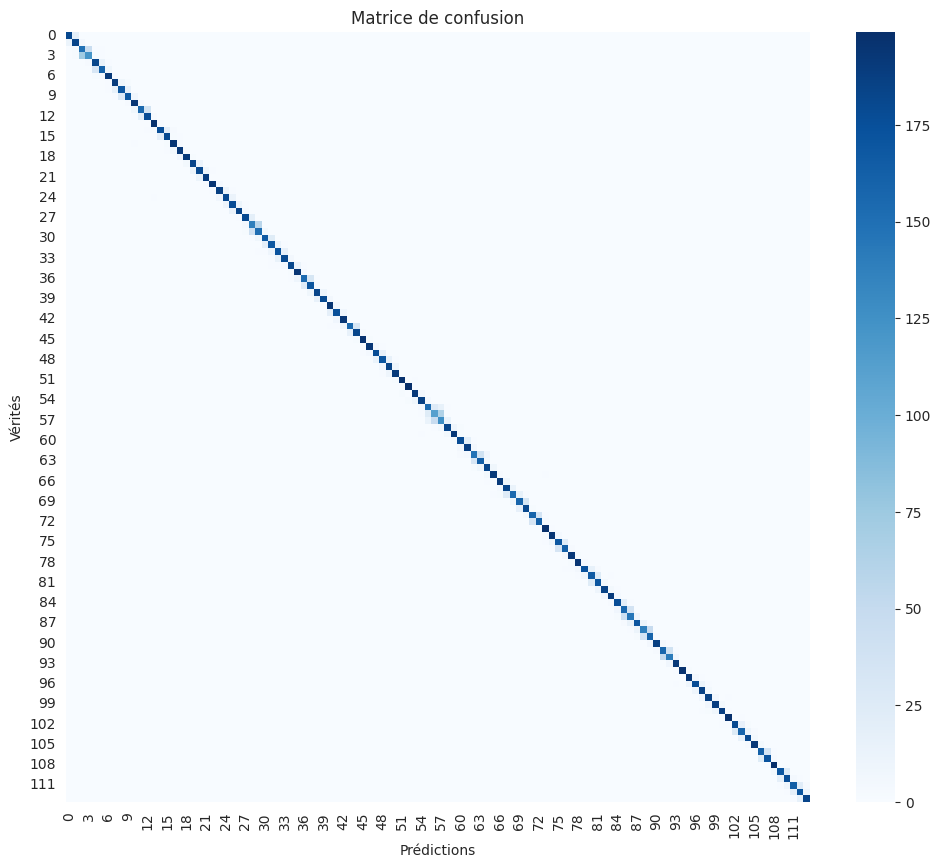

In [38]:
# Confusion matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(12, 10))
sns.heatmap(conf_matrix, annot=False, fmt="d", cmap="Blues")
plt.xlabel('Prédictions')
plt.ylabel('Vérités')
plt.title('Matrice de confusion')
plt.show()


In [41]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.94      0.91      0.92       200
         1.0       0.89      0.92      0.90       200
         2.0       0.65      0.74      0.70       200
         3.0       0.71      0.61      0.66       200
         4.0       0.83      0.91      0.87       200
         5.0       0.89      0.80      0.84       200
         6.0       0.95      0.96      0.95       200
         7.0       0.90      0.94      0.92       200
         8.0       0.84      0.84      0.84       200
         9.0       0.89      0.83      0.86       200
        10.0       0.92      0.96      0.94       200
        11.0       0.87      0.78      0.82       200
        12.0       0.83      0.89      0.86       200
        13.0       0.97      0.98      0.98       200
        14.0       0.89      0.88      0.89       200
        15.0       0.90      0.90      0.90       200
        16.0       0.95      0.97      0.96       200
        17.0       0.95    

In [42]:
def save_classification_report(y_test, y_pred, file_path):
    """
    Calcule le rapport de classification et l'enregistre dans un fichier texte.

    Paramètres :
    - y_test : array-like, labels réelles
    - y_pred : array-like, prédictions du modèle
    - file_path : str, chemin du fichier où enregistrer le rapport
    """
    report = classification_report(y_test, y_pred)
    
    with open(file_path, 'w') as file:
        file.write(report)
    print(f"Le rapport a été sauvegardé dans {file_path}")

# Exemple d'utilisation
# y_test et y_pred doivent être définis au préalable
save_classification_report(y_test, y_pred, "/home/matthieu/UbuntuData/PycharmProjects/MelodAI/non_official_models/classification_report.txt")


Le rapport a été sauvegardé dans /home/matthieu/UbuntuData/PycharmProjects/MelodAI/non_official_models/classification_report.txt


In [170]:
# Save model

joblib.dump(rf, os.path.join(model_path, "banger_random_forest_model.pkl"))

['/home/matthieu/UbuntuData/PycharmProjects/MelodAI/non_official_models/banger_random_forest_model.pkl']

In [158]:
# Code a well-structured function to predict a row from the y_test
def predict_row(model, row):
    """
    Predict the genre of a row using a trained model.

    Parameters:
    model: Trained model object.
    row: Input row to predict.

    Returns:
    int: Predicted genre.
    """
    return model.predict(row.values.reshape(1, -1))[0]

## For unique values from validation set

In [168]:
# Test the function using a row from the validation set
iloc = 2313
temp = X_val.iloc[iloc]  # Retrieve the complete row from the validation set
row = temp  # All columns are features
actual_genre = y_val.iloc[iloc]  # The target value from the validation set

print(f"Input row: {row}")
print(f"Predicted genre: {predict_row(rf, row)}")
print(f"Actual genre: {actual_genre}")

Input row: UMAP1    2.676712
UMAP2    0.175155
UMAP3   -4.033050
UMAP4   -0.839369
UMAP5   -1.249678
UMAP6    9.432928
Name: 104242, dtype: float32
Predicted genre: 104.0
Actual genre: 104.0


/home/matthieu/UbuntuData/PycharmProjects/MelodAI/.venv/lib/python3.10/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [48]:
# Predict the genres for the entire validation set
y_val_pred = rf.predict(X_val)

# Compare the predictions with the actual genres
accuracy = accuracy_score(y_val, y_val_pred)
precision = precision_score(y_val, y_val_pred, average='weighted')
recall = recall_score(y_val, y_val_pred, average='weighted')

print(f"Validation Accuracy: {accuracy * 100:.2f}%")
print(f"Validation Precision: {precision * 100:.2f}%")
print(f"Validation Recall: {recall * 100:.2f}%")

Validation Accuracy: 88.80%
Validation Precision: 88.93%
Validation Recall: 88.80%


# GridSearchCV for Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

param_grid = {
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt']
}

rf = RandomForestClassifier(random_state=42)
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

print(f"Meilleurs paramètres : {grid_search.best_params_}")
print(f"Meilleure score : {grid_search.best_score_}")


# **XGBoost**

In [171]:
# XGBoost
from xgboost import XGBClassifier

xgb = XGBClassifier()
print(f"Training XGBoost model...")
xgb.fit(X_train, y_train)
print(f"Training complete!")

y_pred = xgb.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')

Training XGBoost model...
Training complete!


/home/matthieu/UbuntuData/PycharmProjects/MelodAI/.venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [172]:
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")

Accuracy: 0.38719298245614037
Precision: 0.19678379878986857
Recall: 0.38719298245614037
